# Modelo predicción venta de productos

## Librerías

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import copy
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Dataset

In [2]:
df_FlOr = pd.read_csv('Filghts TEC_Valid.csv')
df_FlWor = copy.deepcopy(df_FlOr)
df_FlWor.head()

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0
2,6cfa1bbaa44f08fc7d3061f034a6a5ce,XA-VBV,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:10:00,2024-02-16 17:55:00,220,NaN,NaN
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0


In [3]:
df_SalesOr = pd.read_csv('Sales TEC_Valid.csv')
df_SalesWor = copy.deepcopy(df_SalesOr)

In [4]:
df_SalesWor.head()

,Flight_ID,ProductType,ProductName,Quantity,TotalSales
0,a05290288259526edd3601160b10e1de,Botanas,Carne Seca Habanero,1,55.0
1,08f6f97437df8db101b050f1110be656,Licores,Jw Red Label,2,240.0
2,4e09c949826a77207868412baeff6d30,Licores,Jack And Coke,8,576.0
3,c3e1568fe46c68d3174681d322d412b3,Licores,Jw Red Label,2,240.0
4,7396e43fb94caca87add7bb1f1611e7e,Vivabus,Vivabus_Gdl.-Nvo. C. Camionera,4,320.0


### Combinar bases de datos

In [5]:
df_combinado = pd.merge(df_FlWor, df_SalesWor, on='Flight_ID', how='inner')

In [6]:
df_combinado.head(100)

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings,ProductType,ProductName,Quantity,TotalSales
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,Galletas,Chokis,1,45.0
1,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,Refrescos,Sprite,1,48.0
2,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,Licores,Amstel Ultra,2,144.0
3,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,Bebidas Calientes,Cafe 19 Capuchino,1,45.0
4,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,Specials,Combo Snack,5,-35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,281ae1ba6c678889e306cd9cae468daf,XA-VAM,AO,AR,Playa,Ciudad Principal,2023-12-13 12:10:00,2023-12-13 12:50:00,180,110.0,78.0,Perecederos,Panini Clasico,1,115.0
96,281ae1ba6c678889e306cd9cae468daf,XA-VAM,AO,AR,Playa,Ciudad Principal,2023-12-13 12:10:00,2023-12-13 12:50:00,180,110.0,78.0,Refrescos,Coca Sin Azucar,1,48.0
97,281ae1ba6c678889e306cd9cae468daf,XA-VAM,AO,AR,Playa,Ciudad Principal,2023-12-13 12:10:00,2023-12-13 12:50:00,180,110.0,78.0,Refrescos,Coca Cola Regular,4,192.0
98,281ae1ba6c678889e306cd9cae468daf,XA-VAM,AO,AR,Playa,Ciudad Principal,2023-12-13 12:10:00,2023-12-13 12:50:00,180,110.0,78.0,Botanas,Sabritas Originales,3,147.0


## Limpieza de los datos

In [7]:
df = df_combinado.copy()

In [8]:
df.isna().any()

Flight_ID           False
Aeronave             True
DepartureStation    False
ArrivalStation      False
Destination_Type    False
Origin_Type         False
STD                 False
STA                 False
Capacity            False
Passengers           True
Bookings             True
ProductType         False
ProductName         False
Quantity            False
TotalSales          False
dtype: bool

In [9]:
df.isna().sum()

Flight_ID              0
Aeronave            8656
DepartureStation       0
ArrivalStation         0
Destination_Type       0
Origin_Type            0
STD                    0
STA                    0
Capacity               0
Passengers            41
Bookings              41
ProductType            0
ProductName            0
Quantity               0
TotalSales             0
dtype: int64

In [10]:
df = df.dropna()
df.shape

(2551211, 15)

In [11]:
df.isna().any()

Flight_ID           False
Aeronave            False
DepartureStation    False
ArrivalStation      False
Destination_Type    False
Origin_Type         False
STD                 False
STA                 False
Capacity            False
Passengers          False
Bookings            False
ProductType         False
ProductName         False
Quantity            False
TotalSales          False
dtype: bool

## Transformación de Datos

### Encoding categoría de producto

In [12]:
dict_producttype=dict(zip(df['ProductType'],pd.factorize(df['ProductType'])[0]+1))

In [13]:
df['ProductType']=df['ProductType'].map(dict_producttype)

### Nombre de productos 

In [14]:
dict_productname=dict(zip(df['ProductName'],pd.factorize(df['ProductName'])[0]+1))
df['ProductName']=df['ProductName'].map(dict_productname)

### Enconding Aeronave

In [15]:
dict_aeronave=dict(zip(df['Aeronave'],pd.factorize(df['Aeronave'])[0]+1))
df['Aeronave']=df['Aeronave'].map(dict_aeronave)

### Encoding Departure y Arrival

In [16]:
dict_departure=dict(zip(df['DepartureStation'],pd.factorize(df['DepartureStation'])[0]+1))
df['DepartureStation']=df['DepartureStation'].map(dict_departure)
df['ArrivalStation']=df['ArrivalStation'].map(dict_departure)


### Encoding Destination y Origin

In [17]:
dict_destination=dict(zip(df['Destination_Type'],pd.factorize(df['Destination_Type'])[0]+1))
df['Destination_Type']=df['Destination_Type'].map(dict_destination)
df['Origin_Type']=df['Origin_Type'].map(dict_destination)

### Encoding Datetime

In [18]:
df['STD'] = pd.to_datetime(df['STD'])
df['STA'] = pd.to_datetime(df['STA'])
df['MesDEP']=df['STD'].dt.month
df['DiaDEP']=df['STD'].dt.day
df['Dia_semanaDEP']=df['STD'].dt.dayofweek
df['HoraDEP']=df['STD'].dt.hour
df['MinutosDEP']=df['STD'].dt.minute
df['HoraARR']=df['STA'].dt.hour
df['MinutosARR']=df['STA'].dt.minute
HORAMIN=(df['HoraARR']-df['HoraDEP'])*60
df['Duración']=df['MinutosARR']-df['MinutosDEP']+HORAMIN


In [19]:
df

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,...,Quantity,TotalSales,MesDEP,DiaDEP,Dia_semanaDEP,HoraDEP,MinutosDEP,HoraARR,MinutosARR,Duración
0,ab954014077430bd842cfa305a55c0f8,1,1,30,1,4,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,...,1,45.0,10,19,3,11,40,14,25,165
1,ab954014077430bd842cfa305a55c0f8,1,1,30,1,4,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,...,1,48.0,10,19,3,11,40,14,25,165
2,ab954014077430bd842cfa305a55c0f8,1,1,30,1,4,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,...,2,144.0,10,19,3,11,40,14,25,165
3,ab954014077430bd842cfa305a55c0f8,1,1,30,1,4,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,...,1,45.0,10,19,3,11,40,14,25,165
4,ab954014077430bd842cfa305a55c0f8,1,1,30,1,4,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,...,5,-35.0,10,19,3,11,40,14,25,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559903,9c8970e9836d9c5ef9415bfa93c3f408,35,1,27,3,4,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0,...,3,216.0,12,22,4,12,50,16,10,200
2559904,9c8970e9836d9c5ef9415bfa93c3f408,35,1,27,3,4,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0,...,9,432.0,12,22,4,12,50,16,10,200
2559905,9c8970e9836d9c5ef9415bfa93c3f408,35,1,27,3,4,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0,...,1,45.0,12,22,4,12,50,16,10,200
2559906,9c8970e9836d9c5ef9415bfa93c3f408,35,1,27,3,4,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0,...,1,45.0,12,22,4,12,50,16,10,200


### Dataframe Test

In [57]:
df2=df_combinado.copy()
df3=df2[df2['Passengers'].isna()]
df3['ProductType']=df3['ProductType'].map(dict_producttype)
df3['ProductName']=df3['ProductName'].map(dict_productname)
df3['Aeronave']=df3['Aeronave'].map(dict_aeronave)
df3['DepartureStation']=df3['DepartureStation'].map(dict_departure)
df3['ArrivalStation']=df3['ArrivalStation'].map(dict_departure)
df3['Destination_Type']=df3['Destination_Type'].map(dict_destination)
df3['Origin_Type']=df3['Origin_Type'].map(dict_destination)
df3['STD'] = pd.to_datetime(df3['STD'])
df3['STA'] = pd.to_datetime(df3['STA'])
df3['MesDEP']=df3['STD'].dt.month
df3['DiaDEP']=df3['STD'].dt.day
df3['Dia_semanaDEP']=df3['STD'].dt.dayofweek
df3['HoraDEP']=df3['STD'].dt.hour
df3['MinutosDEP']=df3['STD'].dt.minute
df3['HoraARR']=df3['STA'].dt.hour
df3['MinutosARR']=df3['STA'].dt.minute
HORAMIN=(df3['HoraARR']-df3['HoraDEP'])*60
df3['Duración']=df3['MinutosARR']-df3['MinutosDEP']+HORAMIN

/var/folders/91/c30btngx5s39pyvktdkr6rbr0000gn/T/ipykernel_91040/1884244426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ProductType']=df3['ProductType'].map(dict_producttype)
/var/folders/91/c30btngx5s39pyvktdkr6rbr0000gn/T/ipykernel_91040/1884244426.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ProductName']=df3['ProductName'].map(dict_productname)
/var/folders/91/c30btngx5s39pyvktdkr6rbr0000gn/T/ipykernel_91040/1884244426.py:5: SettingWithCopyWarning: 
A value is trying to be set o

In [21]:
df3.head()

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,...,Quantity,TotalSales,MesDEP,DiaDEP,Dia_semanaDEP,HoraDEP,MinutosDEP,HoraARR,MinutosARR,Duración
830520,174d2db63f8382ae29183ee189a6f0e5,44,2,5,4,1,2024-01-01 12:30:00,2024-01-01 17:25:00,180,NaN,...,1,-7.0,1,1,0,12,30,17,25,295
830521,174d2db63f8382ae29183ee189a6f0e5,44,2,5,4,1,2024-01-01 12:30:00,2024-01-01 17:25:00,180,NaN,...,1,42.0,1,1,0,12,30,17,25,295
830522,174d2db63f8382ae29183ee189a6f0e5,44,2,5,4,1,2024-01-01 12:30:00,2024-01-01 17:25:00,180,NaN,...,1,45.0,1,1,0,12,30,17,25,295
830523,174d2db63f8382ae29183ee189a6f0e5,44,2,5,4,1,2024-01-01 12:30:00,2024-01-01 17:25:00,180,NaN,...,1,-28.0,1,1,0,12,30,17,25,295
830524,174d2db63f8382ae29183ee189a6f0e5,44,2,5,4,1,2024-01-01 12:30:00,2024-01-01 17:25:00,180,NaN,...,2,144.0,1,1,0,12,30,17,25,295


## Análisis Exploratorio

Tipos de productos más comunes

Para esta variable se optó por realizar un diagrama de pie para observar la distribución del número de los 10 tipos de productos más vendidos, podemos observar que el tipo de producto 6 y 2 fueron con total diferencia aquellos que más se vendieron.

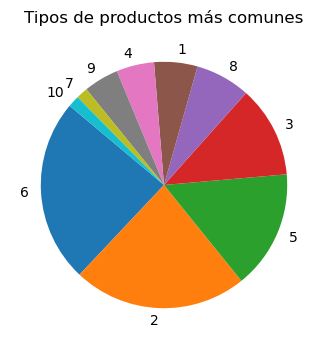

ProductType
6     609074
2     577608
5     393837
3     303811
8     182506
1     143666
4     125260
9     116184
7      38754
10     38290
Name: count, dtype: int64

In [22]:
tipos_productos_counts = df['ProductType'].value_counts()

mas_tipos = tipos_productos_counts.head(10)

plt.figure(figsize=(5, 4))
plt.pie(mas_tipos, labels=mas_tipos.index, startangle=140)
plt.title('Tipos de productos más comunes')
plt.show()
display(mas_tipos)

Tipos de productos menos comunes

Para este diagrama de pie se realizó el mismo concepto que en el anterior, simplemente con el objetivo de econtrar los tipos de productos que menos se vendieron, resultando que el tipo de producto 16 solamente se vendió un total de 4 veces, por lo que es inexplicablemente poco lo que se vende, esto nos da una idea de que deberían dejar de venderlo para aprovechar mejor ese espacio.

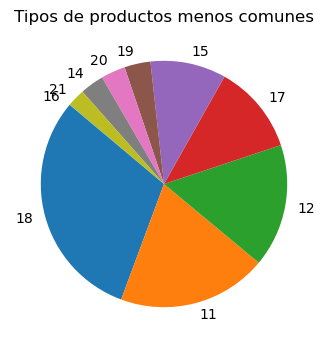

ProductType
18    3747
11    2414
12    1986
17    1442
15    1221
19     421
20     394
14     385
21     288
16       4
Name: count, dtype: int64

In [23]:
tipos_productos_counts = df['ProductType'].value_counts()

menos_tipos = tipos_productos_counts.tail(10)

plt.figure(figsize=(5, 4))
plt.pie(menos_tipos, labels=menos_tipos.index, startangle=140)
plt.title('Tipos de productos menos comunes')
plt.show()
display(menos_tipos)

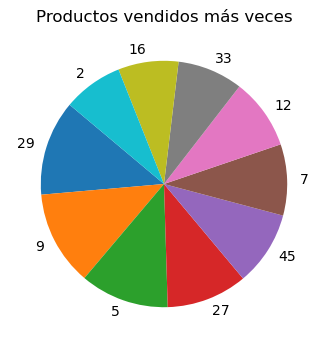

ProductName
29    94685
9     94274
5     88317
27    80341
45    74135
7     70819
12    70524
33    65050
16    59965
2     59616
Name: count, dtype: int64

In [24]:
# Productos vendidos más veces
productos_counts = df['ProductName'].value_counts()

mas_productos = productos_counts.head(10)

plt.figure(figsize=(5, 4))
plt.pie(mas_productos, labels=mas_productos.index, startangle=140)
plt.title('Productos vendidos más veces')
plt.show()
display(mas_productos)

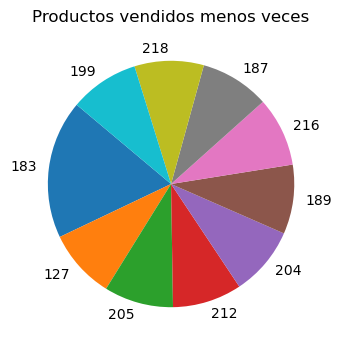

ProductName
183    2
127    1
205    1
212    1
204    1
189    1
216    1
187    1
218    1
199    1
Name: count, dtype: int64

In [25]:
# Productos vendidos menos veces
productos_counts = df['ProductName'].value_counts()

menos_productos = productos_counts.tail(10)

plt.figure(figsize=(5, 4))
plt.pie(menos_productos, labels=menos_productos.index, startangle=140)
plt.title('Productos vendidos menos veces')
plt.show()
display(menos_productos)

### Análisis de correlación

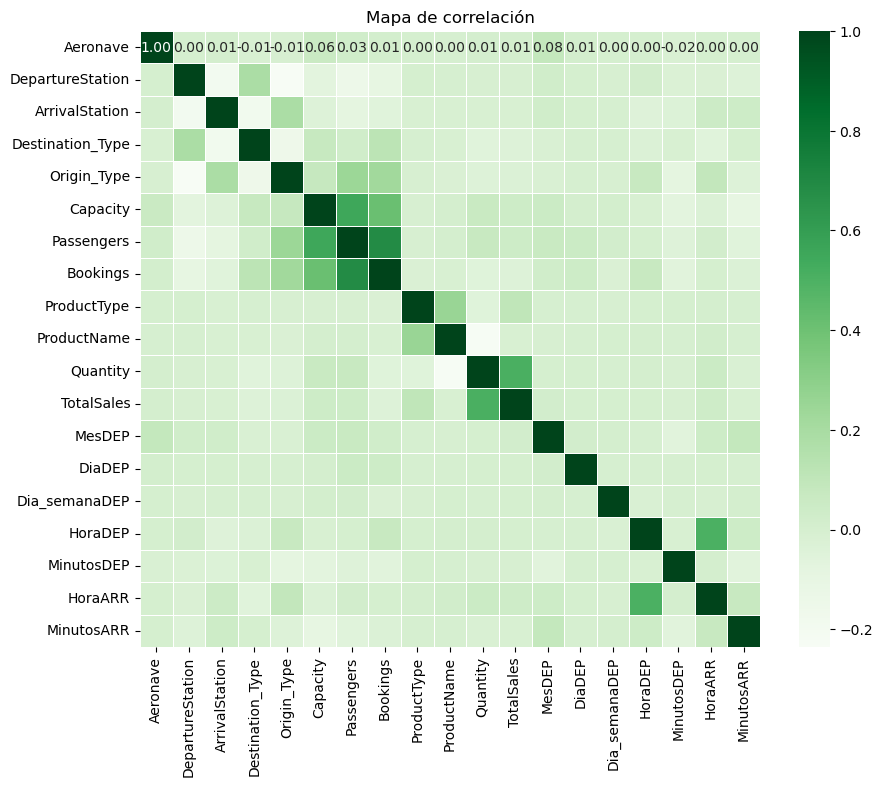

In [26]:
columnas_numericas = df.select_dtypes(include=["int32",'int64', 'float']).columns.tolist()
df_num = df[columnas_numericas]

correlacion = df_num.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Mapa de correlación')
plt.show()

## Modelo

### Separation Train y test

In [27]:
df

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,...,Quantity,TotalSales,MesDEP,DiaDEP,Dia_semanaDEP,HoraDEP,MinutosDEP,HoraARR,MinutosARR,Duración
0,ab954014077430bd842cfa305a55c0f8,1,1,30,1,4,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,...,1,45.0,10,19,3,11,40,14,25,165
1,ab954014077430bd842cfa305a55c0f8,1,1,30,1,4,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,...,1,48.0,10,19,3,11,40,14,25,165
2,ab954014077430bd842cfa305a55c0f8,1,1,30,1,4,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,...,2,144.0,10,19,3,11,40,14,25,165
3,ab954014077430bd842cfa305a55c0f8,1,1,30,1,4,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,...,1,45.0,10,19,3,11,40,14,25,165
4,ab954014077430bd842cfa305a55c0f8,1,1,30,1,4,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,...,5,-35.0,10,19,3,11,40,14,25,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559903,9c8970e9836d9c5ef9415bfa93c3f408,35,1,27,3,4,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0,...,3,216.0,12,22,4,12,50,16,10,200
2559904,9c8970e9836d9c5ef9415bfa93c3f408,35,1,27,3,4,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0,...,9,432.0,12,22,4,12,50,16,10,200
2559905,9c8970e9836d9c5ef9415bfa93c3f408,35,1,27,3,4,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0,...,1,45.0,12,22,4,12,50,16,10,200
2559906,9c8970e9836d9c5ef9415bfa93c3f408,35,1,27,3,4,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0,...,1,45.0,12,22,4,12,50,16,10,200


In [35]:
df3.head()
df3.shape

(41, 23)

### Bookings

In [29]:
X=df.drop(['Passengers','Flight_ID','STD','STA','Bookings','Quantity','HoraARR','MinutosARR','TotalSales','ProductName','ProductType'],axis=1)
y=df['Bookings']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=0,shuffle=True)

model_bookings = RandomForestRegressor(n_estimators=10,max_depth=30, criterion='poisson', random_state=42)
model_bookings.fit(X_train, y_train)

y_pred = model_bookings.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.5987542588891697
Root Mean Squared Error (RMSE): 0.7737921289914815
Mean Absolute Error (MAE): 0.06270894692205747
R-squared (R2): 0.9992966194316169


### Passengers

In [30]:
X=df.drop(['Passengers','Flight_ID','STD','STA','Quantity','MinutosDEP','HoraARR','MinutosARR','TotalSales','Quantity','ProductName','ProductType'],axis=1)
y=df['Passengers']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=0,shuffle=True)

model_passengers = RandomForestRegressor(n_estimators=10,max_depth=30, criterion='poisson', random_state=42)
model_passengers.fit(X_train, y_train)

y_pred = model_passengers.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.3098659496985559
Root Mean Squared Error (RMSE): 0.5566560425420314
Mean Absolute Error (MAE): 0.031644908102200574
R-squared (R2): 0.999754534945583


### Random Forrest

In [31]:

X=df.drop(['Flight_ID','Aeronave','STD','STA','MinutosDEP','HoraARR','MinutosARR','Quantity','TotalSales'],axis=1)
y=df['Quantity']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=0,shuffle=True)
model_ventas = RandomForestRegressor(n_estimators=10,max_depth=30, criterion='poisson', random_state=42)
model_ventas.fit(X_train, y_train)

y_pred = model_ventas.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 3.960765368601478
Root Mean Squared Error (RMSE): 1.9901671710189268
Mean Absolute Error (MAE): 1.2010039638659986
R-squared (R2): 0.53856227821265


## Predicciones

In [61]:
predict_bookings=model_bookings.predict(df3.drop(['Passengers','Flight_ID','STD','STA','Bookings','Quantity',
'HoraARR','MinutosARR','TotalSales','Quantity','ProductName','ProductType'],axis=1))




In [62]:
predict_bookings=pd.Series(predict_bookings)

In [64]:
ytrue=df3['Quantity']
ytrue

830520     1
830521     1
830522     1
830523     1
830524     2
830525     1
830526     1
830527     1
1442149    1
1442150    2
1442151    2
1442152    2
1442153    2
1442154    5
1442155    1
1442156    3
1442157    1
1442158    1
1442159    1
1442160    1
1442161    1
1442162    3
1442163    1
1442164    2
1442165    1
2412875    1
2412876    3
2412877    1
2412878    1
2412879    1
2412880    1
2412881    1
2412882    3
2412883    1
2412884    3
2412885    1
2412886    1
2412887    2
2412888    1
2412889    1
2412890    1
Name: Quantity, dtype: int64

In [65]:
predict_bookings.index=df3['Bookings'].index
df3['Bookings']=predict_bookings
df3['Bookings']

/var/folders/91/c30btngx5s39pyvktdkr6rbr0000gn/T/ipykernel_91040/2297543616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Bookings']=predict_bookings


830520      93.3
830521      93.3
830522      93.3
830523      93.3
830524      93.3
830525      93.3
830526      93.3
830527      93.3
1442149     88.5
1442150     88.5
1442151     88.5
1442152     88.5
1442153     88.5
1442154     88.5
1442155     88.5
1442156     88.5
1442157     88.5
1442158     88.5
1442159     88.5
1442160     88.5
1442161     88.5
1442162     88.5
1442163     88.5
1442164     88.5
1442165     88.5
2412875    102.0
2412876    102.0
2412877    102.0
2412878    102.0
2412879    102.0
2412880    102.0
2412881    102.0
2412882    102.0
2412883    102.0
2412884    102.0
2412885    102.0
2412886    102.0
2412887    102.0
2412888    102.0
2412889    102.0
2412890    102.0
Name: Bookings, dtype: float64

In [66]:
predict_passengers=model_passengers.predict(df3.drop(['Passengers','Flight_ID','STD','STA',
'Quantity','MinutosDEP','HoraARR','MinutosARR','TotalSales','Quantity','ProductName','ProductType'],axis=1))
predict_passengers=pd.Series(predict_passengers)
predict_passengers.index=df3['Passengers'].index
df3['Passengers']=predict_passengers
df3['Passengers']

/var/folders/91/c30btngx5s39pyvktdkr6rbr0000gn/T/ipykernel_91040/1977848586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Passengers']=predict_passengers


830520     133.0
830521     133.0
830522     133.0
830523     133.0
830524     133.0
830525     133.0
830526     133.0
830527     133.0
1442149    223.6
1442150    223.6
1442151    223.6
1442152    223.6
1442153    223.6
1442154    223.6
1442155    223.6
1442156    223.6
1442157    223.6
1442158    223.6
1442159    223.6
1442160    223.6
1442161    223.6
1442162    223.6
1442163    223.6
1442164    223.6
1442165    223.6
2412875    185.6
2412876    185.6
2412877    185.6
2412878    185.6
2412879    185.6
2412880    185.6
2412881    185.6
2412882    185.6
2412883    185.6
2412884    185.6
2412885    185.6
2412886    185.6
2412887    185.6
2412888    185.6
2412889    185.6
2412890    185.6
Name: Passengers, dtype: float64

In [83]:

predict_ventas=model_ventas.predict(df3.drop(['Flight_ID','Aeronave','STD','STA','MinutosDEP','HoraARR',
'MinutosARR','Quantity','TotalSales'],axis=1))
predict_ventas=pd.Series(predict_ventas)
predict_ventas.index = df3['Quantity'].index
df3['Quantity']=predict_ventas
df3['Quantity']


/var/folders/91/c30btngx5s39pyvktdkr6rbr0000gn/T/ipykernel_91040/3802141365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Quantity']=predict_ventas


830520      1.218750
830521      1.800000
830522      2.200000
830523      4.600000
830524      2.800000
830525      3.200000
830526      9.900000
830527      5.800000
1442149     2.374227
1442150     5.300000
1442151     7.600000
1442152     2.537500
1442153     2.020833
1442154    21.800000
1442155     2.700000
1442156    15.300000
1442157     1.200000
1442158     5.300000
1442159     7.200000
1442160     3.520000
1442161    10.450000
1442162    12.123932
1442163     1.800000
1442164     3.287500
1442165     3.334783
2412875     1.625490
2412876    11.800000
2412877     3.000000
2412878     2.000000
2412879     2.300000
2412880     1.325490
2412881     2.300000
2412882     4.360000
2412883     3.029167
2412884     8.200000
2412885     2.700000
2412886     2.966667
2412887     6.100000
2412888     1.800000
2412889    10.300000
2412890     1.300000
Name: Quantity, dtype: float64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7eb2bdd1-e0a1-4ac1-a322-350e4de3089d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [73]:
dict_producttype

{'Galletas': 1,
 'Refrescos': 2,
 'Licores': 3,
 'Bebidas Calientes': 4,
 'Specials': 5,
 'Botanas': 6,
 'OFERTAS ': 7,
 'Perecederos': 8,
 'Sopas': 9,
 'Lacteos': 10,
 'Hertz.': 11,
 'COMBOS CREW': 12,
 'Vivabus': 13,
 'VIVA PLAY': 14,
 'Transportaciones MTY': 15,
 'Alimentos Charter': 16,
 'VIVA Taxis': 17,
 'Transportaciones CUN': 18,
 'VivaTransfer': 19,
 'Antros': 20,
 'Transportaciones TLC': 21}

In [88]:
df_predicts=pd.DataFrame([ytrue,df3['Quantity'],df3['ProductType']]).T
cols=['Quantity','Quantity_predict','ProductType']
df_predicts.columns=cols
df_predicts

,Quantity,Quantity_predict,ProductType
830520,1.0,1.218750,5.0
830521,1.0,1.800000,1.0
830522,1.0,2.200000,4.0
830523,1.0,4.600000,5.0
830524,2.0,2.800000,3.0
830525,1.0,3.200000,8.0
830526,1.0,9.900000,2.0
830527,1.0,5.800000,6.0
1442149,1.0,2.374227,9.0
1442150,2.0,5.300000,6.0


In [90]:
df_perecederos=df_predicts[df_predicts['ProductType'] == 8]
df_perecederos

,Quantity,Quantity_predict,ProductType
830525,1.0,3.200000,8.0
1442165,1.0,3.334783,8.0
2412879,1.0,2.300000,8.0
